In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

from skimage.io import imread
from skimage.transform import resize

import tensorflow as tf

from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

<h1>Neural Networks Architectures</h1>

In [3]:
vgg19 = VGG19()

In [4]:
cat_image = imread("https://static01.nyt.com/images/2021/09/14/science/07CAT-STRIPES/07CAT-STRIPES-superJumbo.jpg")

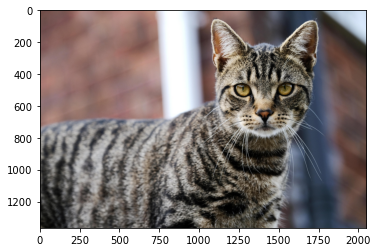

In [5]:
plt.imshow(cat_image)

In [6]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
cat_image_resized = resize(cat_image, (224, 224), preserve_range = True)

In [8]:
cat_image_preprocessed = preprocess_input(cat_image_resized)

In [9]:
cat_image_preprocessed

array([[[ -30.86757143,  -37.779     ,  -11.68      ],
        [ -29.939     ,  -36.779     ,  -10.5628125 ],
        [ -27.77716964,  -37.325875  ,   -9.68      ],
        ...,
        [ 140.061     ,  109.221     ,   87.32      ],
        [ 138.27528571,  107.221     ,   85.32      ],
        [ 139.061     ,  105.221     ,   83.32      ]],

       [[ -30.939     ,  -37.779     ,  -10.01370536],
        [ -30.579625  ,  -37.779     ,   -9.68      ],
        [ -29.939     ,  -39.419625  ,  -11.320625  ],
        ...,
        [ 139.061     ,  109.221     ,   87.32      ],
        [ 139.061     ,  108.221     ,   85.53428571],
        [ 139.061     ,  106.221     ,   84.32      ]],

       [[ -31.939     ,  -38.53234821,  -10.68      ],
        [ -32.673375  ,  -39.779     ,  -11.68      ],
        [ -31.939     ,  -39.779     ,  -11.68      ],
        ...,
        [ 139.061     ,  110.221     ,   87.32      ],
        [ 139.061     ,  108.43528571,   86.32      ],
        [ 138.37908036

In [10]:
cat_image_preprocessed = tf.expand_dims(cat_image_preprocessed, 0)

In [11]:
predictions = vgg19.predict(cat_image_preprocessed)

In [12]:
predictions.max()

0.6504249

In [13]:
predictions.sort()
predictions.shape

(1, 1000)

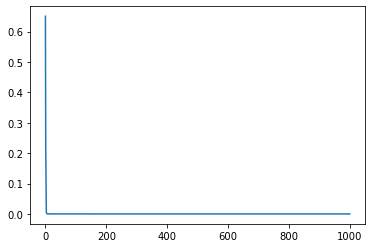

In [14]:
# This graph shows that the model knows what is doing.
plt.plot(predictions[0][::-1])
plt.show()

In [15]:
decode_predictions(predictions, top = 1)

[[('n15075141', 'toilet_tissue', 0.6504249)]]

In [16]:
# Mosquito net indicates that the model don't work as expected - should be refined the preprocessing.
decode_predictions(vgg19.predict(np.random.normal(size = (5, 224, 224, 3))), top = 1)

[[('n03788365', 'mosquito_net', 0.05623747)],
 [('n03788365', 'mosquito_net', 0.051403597)],
 [('n03788365', 'mosquito_net', 0.05540279)],
 [('n03788365', 'mosquito_net', 0.06295635)],
 [('n03788365', 'mosquito_net', 0.05313302)]]